In [2]:
# GOLD PRICE PREDICTION USING MACHINE LEARNING IN PYTHON

In [3]:
# 1) Import the libraries and read the Gold ETF data

# LinearRegression is a machine learning library for linear regression

from sklearn.linear_model import LinearRegression

# Pandas and numpy are used for data manipulation

import pandas as pd

import numpy as np

#matplotlib and seaborn are used for plotting graphs

import matplotlib.pyplot as plt

import seaborn

# fix_yahoo_finance is used to fetch data

import fix_yahoo_finance as yf

In [4]:
# Read data

Df = yf.download('GLD', '2008-01-01','2017-12-31')

[*********************100%***********************]  1 of 1 downloaded


In [6]:
# Only keep close columns

Df = Df[['Close']]

# Drop rows with missing values

Df = Df.dropna()

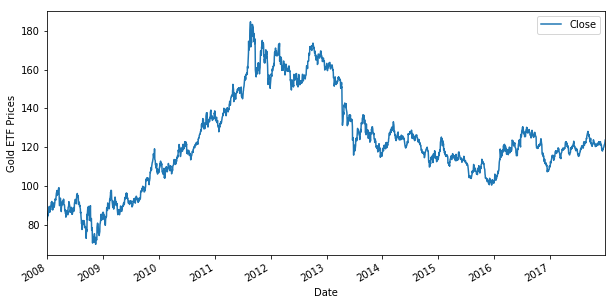

In [7]:
# Plot the closing price of GLD

Df.plot(figsize=(10,5))
plt.ylabel('Gold ETF Prices')
plt.show()

In [8]:
# 2) Define explanatory variables


# Explanatory variable are features which we want to use to predict the Gold ETF price.
# The explanatory variables in this strategy are the moving averages for past 3 days and 9 days

Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['S_9'] = Df['Close'].shift(1).rolling(window=9).mean()

Df = Df.dropna()

X = Df[['S_3','S_9']]

In [9]:
X.head()

,S_3,S_9
Date,,
2008-01-14,87.793335,85.883333
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555


In [35]:
# We store the ETF Gold price in y

y = Df['Close']

In [36]:
y.head()

Date
2008-01-14    89.540001
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
Name: Close, dtype: float64

In [37]:
# 3) Split the data into train and test dataset

# The training data is used to create the linear regression model by pairing the input with expected output.
# The test data is used to estimate how well the model has been trained.

# 80% of the data is used for training and remaning data (20%) for testing

t = 0.8

t = int(t*len(Df))

# Train dataset

X_train = X[:t]
y_train = y[:t]

#Test dataset

X_test = X[t:]
y_test = y[t:]


In [38]:
# Create a linear regression model

# Y = m1 * X1 + m2 * X2 + C
# Gold ETF price = m1 * 3 days moving average + m2 * 9 days moving average + c

linear = LinearRegression().fit(X_train,y_train)

print("Gold ETF price =", round(linear.coef_[0],2),"* 3 Days Moving Average", round(linear.coef_[1],2), "* 9 Days Moving average +", round(linear.intercept_,2))

Gold ETF price = 1.19 * 3 Days Moving Average -0.2 * 9 Days Moving average + 0.37


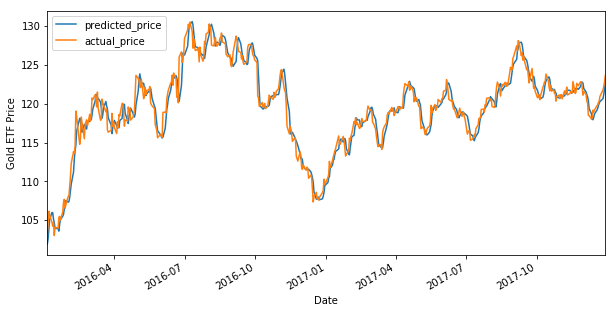

In [14]:
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

predicted_price.plot(figsize=(10,5))

y_test.plot()

plt.legend(['predicted_price','actual_price'])

plt.ylabel("Gold ETF Price")

plt.show()

In [25]:
from sklearn.metrics import r2_score

In [49]:
r2_score(pd.DataFrame(y_test), predicted_price)

0.94906768371643413